# TELECOM CHURN CASE STUDY

## Problem Statement
 

### Business Objective

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

#### The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
RANDOM_STATE = 42

Using TensorFlow backend.


## Data Preparation

In [2]:
churn_data = pd.read_csv('telecom_churn_data.csv', encoding="ISO-8859-1")
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
data_dict = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
data_dict.head()

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls


In [4]:
print(churn_data.info())
churn_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [5]:
# Column of ID and Date types
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
            ]

# We do not need id and date columns which can be dropped
print("Before dropping: ", churn_data.shape)
churn_data = churn_data.drop(id_cols + date_cols, axis=1)
print("After dropping: ", churn_data.shape)

Before dropping:  (99999, 226)
After dropping:  (99999, 220)


### Handle Missing Data

In [6]:
# Columns with missing values
missing_values = pd.Series(round(100*(churn_data.isnull().sum())/len(churn_data), 1))
missing_values[missing_values > 0]

loc_og_t2o_mou               1.0
std_og_t2o_mou               1.0
loc_ic_t2o_mou               1.0
onnet_mou_6                  3.9
onnet_mou_7                  3.9
onnet_mou_8                  5.4
onnet_mou_9                  7.7
offnet_mou_6                 3.9
offnet_mou_7                 3.9
offnet_mou_8                 5.4
offnet_mou_9                 7.7
roam_ic_mou_6                3.9
roam_ic_mou_7                3.9
roam_ic_mou_8                5.4
roam_ic_mou_9                7.7
roam_og_mou_6                3.9
roam_og_mou_7                3.9
roam_og_mou_8                5.4
roam_og_mou_9                7.7
loc_og_t2t_mou_6             3.9
loc_og_t2t_mou_7             3.9
loc_og_t2t_mou_8             5.4
loc_og_t2t_mou_9             7.7
loc_og_t2m_mou_6             3.9
loc_og_t2m_mou_7             3.9
loc_og_t2m_mou_8             5.4
loc_og_t2m_mou_9             7.7
loc_og_t2f_mou_6             3.9
loc_og_t2f_mou_7             3.9
loc_og_t2f_mou_8             5.4
loc_og_t2f

In [7]:
# After examining Data Dictionary, columns where we can impute missing as Zero
cols_impute_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                    'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                    'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
                   ]

churn_data[cols_impute_zero] = churn_data[cols_impute_zero].fillna(0)
print(churn_data[cols_impute_zero].isnull().sum()*100/len(churn_data))

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [8]:
# Categorical Columns with Missing Values
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

# Impute mode for categorical columns
modes = churn_data[cat_cols].agg('median')
print(modes)
for col in cat_cols:
    churn_data[col]=churn_data[col].fillna(modes[col])
    
print(churn_data[cat_cols].isnull().sum()*100/len(churn_data))

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           1.0
fb_user_7           1.0
fb_user_8           1.0
fb_user_9           1.0
dtype: float64
night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


In [9]:
# Drop Columns with more than 70% missing Values
missing_values = pd.Series(round(100*(churn_data.isnull().sum())/len(churn_data), 1))
print(f'Columns with more than 70% missing values: {len(missing_values[missing_values > 70])}')
missing_values[missing_values > 70]

# Drop columns
thresh = len(churn_data) * .7
churn_data = churn_data.dropna(thresh = thresh, axis = 1)

# Check dropped
missing_values = pd.Series(round(100*(churn_data.isnull().sum())/len(churn_data), 1))
print(f'Columns with more than 70% missing values after dropping: {len(missing_values[missing_values > 70])}')
#missing_values[missing_values > 0]

Columns with more than 70% missing values: 20


date_of_last_rech_data_6    74.8
date_of_last_rech_data_7    74.4
date_of_last_rech_data_8    73.7
date_of_last_rech_data_9    74.1
count_rech_2g_6             74.8
count_rech_2g_7             74.4
count_rech_2g_8             73.7
count_rech_2g_9             74.1
count_rech_3g_6             74.8
count_rech_3g_7             74.4
count_rech_3g_8             73.7
count_rech_3g_9             74.1
arpu_3g_6                   74.8
arpu_3g_7                   74.4
arpu_3g_8                   73.7
arpu_3g_9                   74.1
arpu_2g_6                   74.8
arpu_2g_7                   74.4
arpu_2g_8                   73.7
arpu_2g_9                   74.1
dtype: float64

Columns with more than 70% missing values after dropping: 0


In [10]:
# Drop Columns with only 1 value as they have no variance
unique_vals = pd.DataFrame(churn_data.nunique()).reset_index()
unique_vals.columns=['Cols','uniques']
one_val_cols = list(unique_vals[unique_vals['uniques']==1]['Cols'])
print("Dropping Columns with only 1 unique value", one_val_cols)
churn_data = churn_data.drop(one_val_cols, axis=1)
print(f'Dropped {len(one_val_cols)} columns')

Dropping Columns with only 1 unique value ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']
Dropped 11 columns


### Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

In [11]:
# Convert to Pandas Datetime type
churn_data['date_of_last_rech_6'] = pd.to_datetime(churn_data['date_of_last_rech_6'])
churn_data['date_of_last_rech_7'] = pd.to_datetime(churn_data['date_of_last_rech_7'])
churn_data['date_of_last_rech_8'] = pd.to_datetime(churn_data['date_of_last_rech_8'])

# Create new features from date column
churn_data['date_of_last_rech_day_6'] = churn_data['date_of_last_rech_6'].dt.day
churn_data['date_of_last_rech_dayofwk_6'] = churn_data['date_of_last_rech_6'].dt.dayofweek.astype(str)

churn_data['date_of_last_rech_day_7'] = churn_data['date_of_last_rech_7'].dt.day
churn_data['date_of_last_rech_dayofwk_7'] = churn_data['date_of_last_rech_7'].dt.dayofweek.astype(str)

churn_data['date_of_last_rech_day_8'] = churn_data['date_of_last_rech_8'].dt.day
churn_data['date_of_last_rech_dayofwk_8'] = churn_data['date_of_last_rech_8'].dt.dayofweek.astype(str)

churn_data = churn_data.drop(columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'])

#### Create new columns using difference between amounts of Month 6 & 7 compared to Month 8

In [12]:
# Get List of all columns with suffix _6
col_6List = churn_data.filter(regex=('_6')).columns

# Remove suffix _6 to get column names
col_list = [x.split('_')[0:-1] for x in col_6List]
col_list = ['_'.join(x) for x in col_list]

# Iterate over each column name
for col in col_list:
    # Create a new column with suffix _diff
    newcol = 'diff_' + col
    # Assign value based on diffrence between (average of _6 and _7) and _8 
    churn_data[newcol] = ((churn_data[col + '_6'].astype('float') + churn_data[col+'_7'].astype('float'))/2) - churn_data[col + '_8'].astype('float')

churn_data[['diff_' + x for x in col_list]]

,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_others,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_max_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb,diff_night_pck_user,diff_monthly_2g,diff_sachet_2g,diff_monthly_3g,diff_sachet_3g,diff_fb_user,diff_date_of_last_rech_day,diff_date_of_last_rech_dayofwk
0,-7.7025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.440,NaN,NaN,NaN,1.5,55.0,0.0,0.0,0.0,0.0,0.0,9.975,7.555,0.0,0.0,0.0,0.0,0.0,0.0,10.5,-0.5
1,-73.7605,43.715,-246.970,0.00,0.000,41.540,-248.135,0.00,1.455,-206.590,2.170,0.100,0.00,2.275,0.0,1.295,0.000,-203.020,-13.470,-334.150,0.855,-346.770,-2.35,-9.540,0.000,-11.890,-357.750,0.000,0.915,0.000,-4.5,-54.0,34.0,3.5,-1.5,52.0,27.0,-311.435,0.000,0.0,0.5,-2.0,0.0,0.0,0.0,2.0,1.5
2,-31.8520,-3.870,-26.400,0.00,0.000,4.385,-15.360,7.34,22.010,-3.625,-7.165,-20.920,-14.71,-42.780,0.0,44.860,0.225,-1.325,25.940,-23.980,61.255,63.220,43.16,-55.995,-3.195,-16.035,49.755,0.105,0.425,2.035,2.5,125.5,57.0,14.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,6.5,-1.0
3,-271.8340,-233.830,44.480,-16.95,-24.995,43.635,72.860,-3.63,0.000,112.865,-269.020,-4.170,0.00,-273.180,0.0,-12.610,0.000,-172.940,32.990,68.955,22.420,124.355,54.96,15.005,0.590,70.560,195.215,0.295,0.000,0.000,-7.5,-331.0,5.0,-10.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,-1.5,-2.0
4,47.5820,15.985,-39.840,0.00,0.000,15.985,-44.500,0.00,0.000,-28.515,0.000,4.655,0.00,4.655,0.0,0.000,0.000,-23.855,-136.725,4.060,0.750,-131.905,-0.86,1.090,0.000,0.230,-131.445,0.000,0.000,0.240,2.5,-14.0,-27.0,-30.0,0.5,28.0,28.0,0.000,0.000,0.0,0.0,0.5,0.0,0.0,-0.5,18.0,-3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-13.7140,-1.530,-17.965,0.00,0.000,-1.530,-15.960,0.00,-3.210,-17.485,0.000,0.000,0.00,0.000,0.0,-0.500,0.000,-17.995,-16.710,-28.635,-32.485,-77.845,0.00,0.000,0.000,0.000,-77.845,0.000,0.000,0.000,0.5,85.0,85.0,30.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,-14.5,2.5
99995,15.9250,7.635,18.530,0.00,0.000,7.470,11.925,-0.07,0.000,19.325,0.165,5.835,3.87,9.875,0.0,-3.050,0.000,26.155,-3.840,-3.535,1.265,-6.110,0.00,7.035,0.000,7.035,0.935,0.000,0.000,0.000,2.0,-72.0,-39.0,-149.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,-7.0,-4.0
99996,114.5935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236.845,NaN,NaN,NaN,3.5,59.5,25.0,15.0,1.0,12.5,19.5,0.105,137.925,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN
99997,-293.6285,0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.0,0.000,0.000,0.000,0.350,3.890,0.000,4.240,0.00,-0.580,0.000,-0.580,3.660,0.000,0.000,0.000,-0.5,-346.5,11.5,11.5,-1.5,11.5,-245.5,22.670,-1265.445,0.0,0.0,0.5,-2.5,0.5,0.0,-2.0,1.0


### Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

After filtering the high-value customers, you should get about 29.9k rows.

In [13]:
# Create new column of average recharge amount for 6 and 7 month (the Good Phase)
churn_data['avg_rech_amt_6_7'] = ( churn_data['total_rech_amt_6'] + churn_data['total_rech_amt_7'] ) / 2

# Get 70th percentile
churn_data = churn_data.loc[(churn_data['avg_rech_amt_6_7'] > np.percentile(churn_data['avg_rech_amt_6_7'], 70))]

# drop the average column
churn_data = churn_data.drop(['avg_rech_amt_6_7'], axis=1)

print(f'Rows after selecting High Value Customer: {len(churn_data)}')

Rows after selecting High Value Customer: 29979


### Remove Rows with Nan Values

In [14]:
# Check for missing values
missing_values = pd.Series(round(100*(churn_data.isnull().sum())/len(churn_data), 1))
print(f'Columns with missing values: {len(missing_values[missing_values > 0])}')
print(f'Max %age of missing values: {max(missing_values[missing_values > 0]) }')
#missing_values[missing_values > 0]
print(f'Rows with Nan Values: {len(churn_data) - len(churn_data.dropna())}')
churn_data = churn_data.dropna()

Columns with missing values: 140
Max %age of missing values: 5.7
Rows with Nan Values: 2357


### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

0    26694
1      928
Name: churn, dtype: int64

Dropped 45 Churn Phase columns


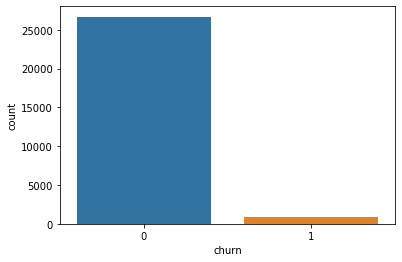

In [15]:
# mark the rows as churn if the sum of the total mou and vol of 9 month is 0
tag_churn_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
churn_data['churn'] = np.where(churn_data[tag_churn_cols].sum(axis=1) == 0, 1, 0 )
churn_data['churn'].value_counts()
sns.countplot(x='churn', data=churn_data)

# Remove all columns of Churn Phase
col_9List = churn_data.filter(regex=('_9')).columns
churn_data = churn_data.drop(col_9List,axis=1)
print(f'Dropped {len(col_9List)} Churn Phase columns')

## EDA

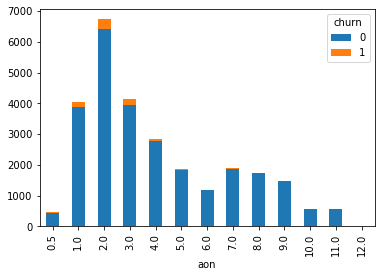

In [16]:
# Divide aon by 30 * 12 to convert from days to years and bin into yearwise segments
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


pd.crosstab(pd.cut(round(((churn_data['aon']/30)/12),1), bins = bins, labels = labels ), churn_data['churn']).plot(kind='bar', stacked=True)

Text(0.5, 1.08, 'arpu (Average Revenue per user)')

Text(0.5, 1.08, 'onnet_mou (On network/ within the same network usage)')

Text(0.5, 1.08, 'Offnet_mou (Calls outside of the operator network)')

Text(0.5, 1.08, 'loc_og_mou (within the circle outgoing calls)')

Text(0.5, 1.08, 'std_og_mou (Outside calling circle/zone calls)')

Text(0.5, 1.08, 'total_og_ (All outgoing calls by the customer)')

Text(0.5, 1.08, 'loc_ic_ (incoming local calls)')

Text(0.5, 1.08, 'std_ic_ (Outside circle incoming calls)')

Text(0.5, 1.08, 'total_ic_ (All incoming calls received by a person)')

Text(0.5, 1.08, 'total_rech_num (Number of times a subscriber recharged his mobile)')

Text(0.5, 1.08, 'total_rech_amt_ Total recharge amount in a particular month')

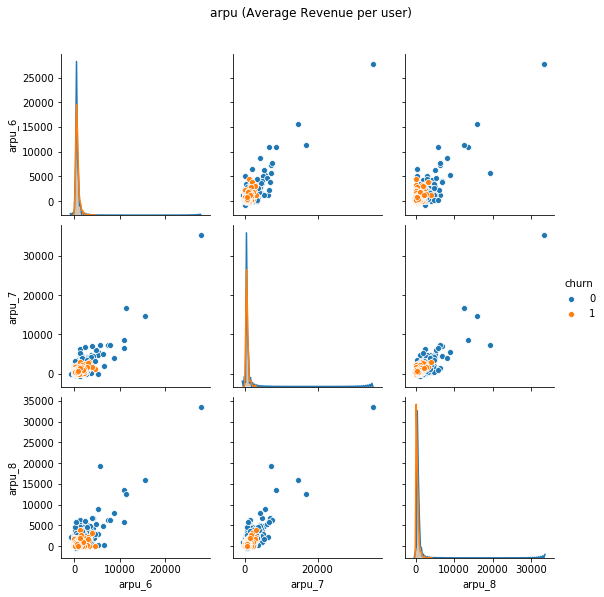

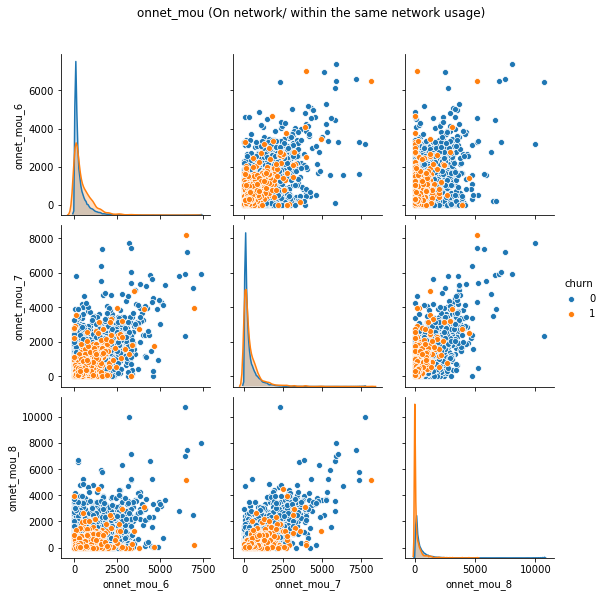

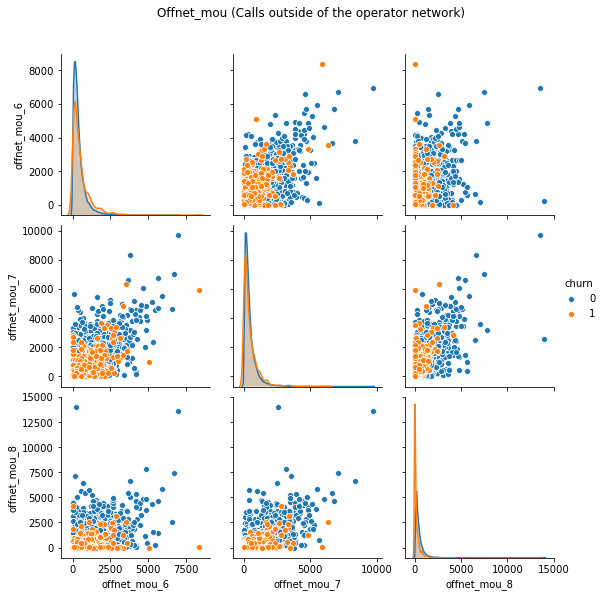

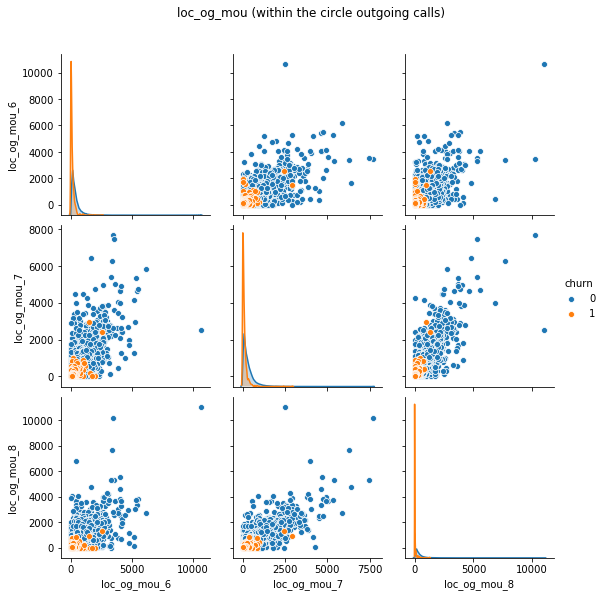

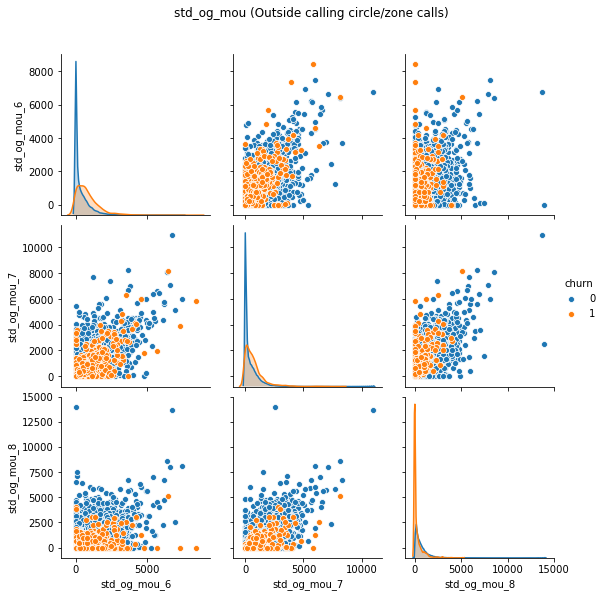

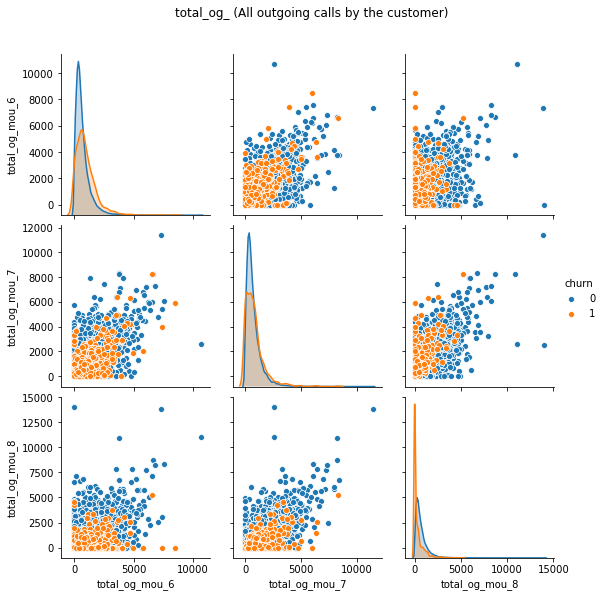

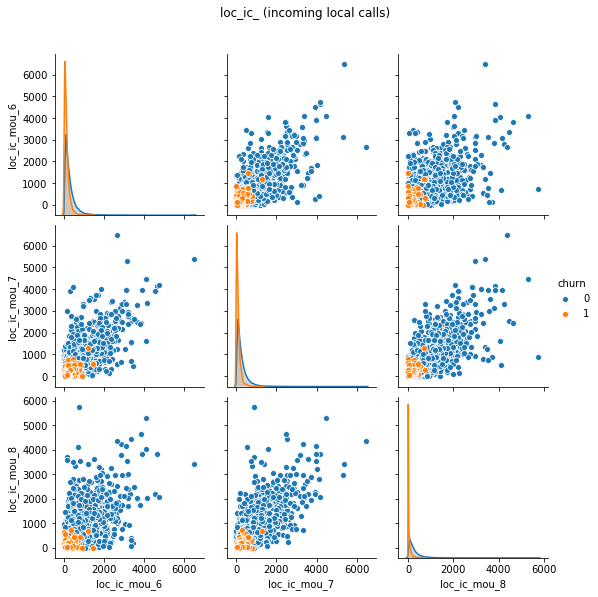

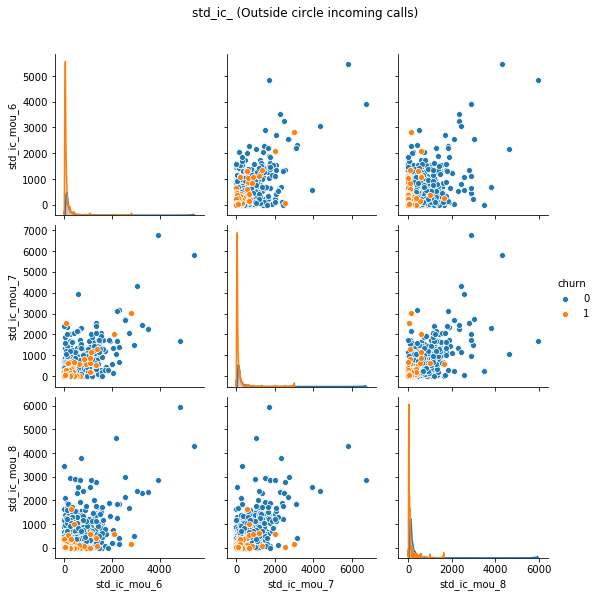

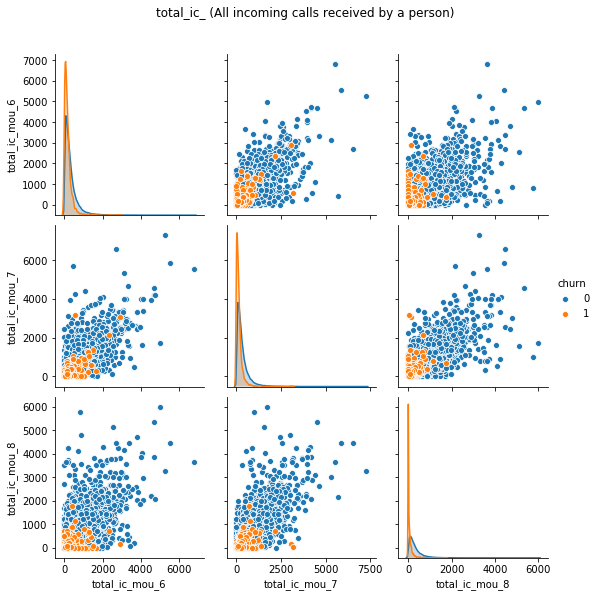

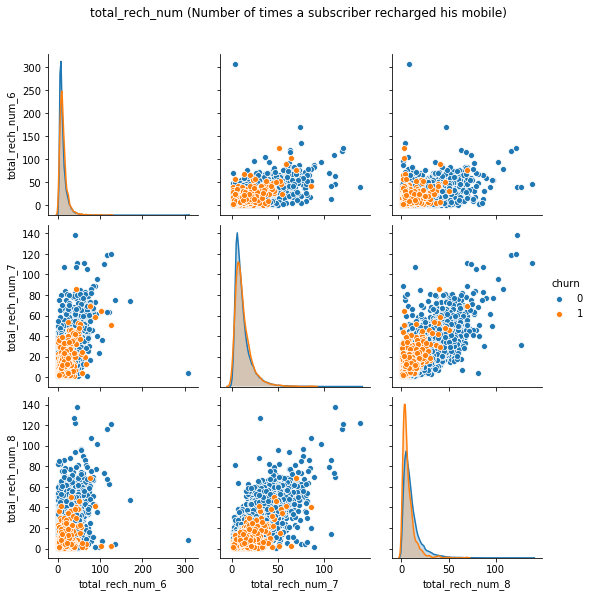

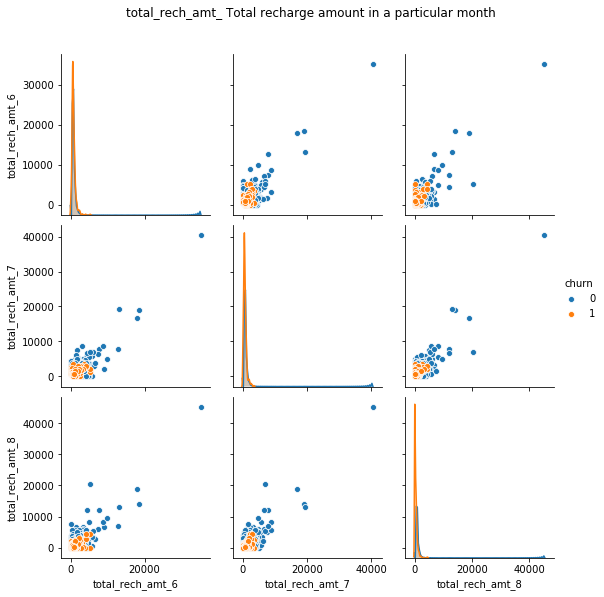

In [17]:
sns.pairplot(data=churn_data[['arpu_6','arpu_7','arpu_8','churn']],hue='churn').fig.suptitle("arpu (Average Revenue per user)", y=1.08)

sns.pairplot(data=churn_data[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']],hue='churn').fig.suptitle("onnet_mou (On network/ within the same network usage)", y=1.08)

sns.pairplot(data=churn_data[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']],hue='churn').fig.suptitle("Offnet_mou (Calls outside of the operator network)", y=1.08)

sns.pairplot(data=churn_data[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']],hue='churn').fig.suptitle("loc_og_mou (within the circle outgoing calls)", y=1.08)

sns.pairplot(data=churn_data[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']],hue='churn').fig.suptitle("std_og_mou (Outside calling circle/zone calls)", y=1.08)

sns.pairplot(data=churn_data[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']],hue='churn').fig.suptitle("total_og_ (All outgoing calls by the customer)", y=1.08)

sns.pairplot(data=churn_data[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn']],hue='churn').fig.suptitle("loc_ic_ (incoming local calls)", y=1.08)

sns.pairplot(data=churn_data[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn']],hue='churn').fig.suptitle("std_ic_ (Outside circle incoming calls)", y=1.08)

sns.pairplot(data=churn_data[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']],hue='churn').fig.suptitle("total_ic_ (All incoming calls received by a person)", y=1.08)

sns.pairplot(data=churn_data[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn']],hue='churn').fig.suptitle("total_rech_num (Number of times a subscriber recharged his mobile)", y=1.08)

sns.pairplot(data=churn_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn']],hue='churn').fig.suptitle("total_rech_amt_ Total recharge amount in a particular month", y=1.08)

## Feature Selection and Dimensionality Reduction using PCA

In [18]:
#Taking a backup of dataset for later use
master_df = churn_data.copy()

### Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

In [19]:
# prepare the dataset
churn = churn_data['churn']
data = churn_data.drop('churn', axis=1)

#split the columns into category and numerical
cat_cols = ['night_pck_user_6','monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6','fb_user_6',
            'night_pck_user_7','monthly_2g_7','sachet_2g_7','monthly_3g_7','sachet_3g_7','fb_user_7',
            'night_pck_user_8','monthly_2g_8','sachet_2g_8','monthly_3g_8','sachet_3g_8','fb_user_8',
            'date_of_last_rech_dayofwk_6', 'date_of_last_rech_dayofwk_7', 'date_of_last_rech_dayofwk_8'] 

num_cols = list(set(data.columns).difference(set(cat_cols)))

### Encode categorical Columns

In [20]:
# dummy encode the categorical columns
data = pd.concat([data,pd.get_dummies(data[cat_cols], drop_first=True)], axis=1)

# drop the original columns
data.drop(cat_cols, axis=1, inplace=True)

### Standardize Numeric Columns

In [21]:
#Standardize the numeric values
data[num_cols] = (( data[num_cols] - data[num_cols].mean() ) / data[num_cols].std())

In [22]:
X = data
Y = churn

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=RANDOM_STATE)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(19335, 190) (19335,)
(8287, 190) (8287,)


#### plot feature correlation prior to PCA

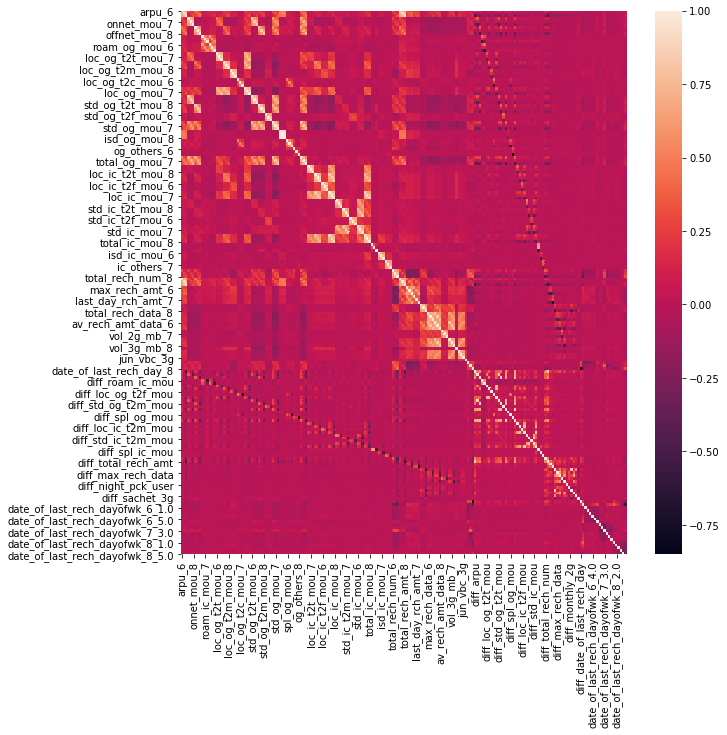

In [23]:
plt.rcParams["figure.figsize"] =(10,10)
sns.heatmap(data=X.corr())

### Handle Class Imbalance Using SMOTE

In [24]:
smote = SMOTE(random_state=RANDOM_STATE)
X_train, Y_train = smote.fit_sample(X_train, Y_train)

print('Class Balance count : ',Counter(Y_train))


Class Balance count :  Counter({0: 18692, 1: 18692})


### PCA

In [25]:
#initialize the pca with randomized
pca = PCA(svd_solver='randomized', random_state=RANDOM_STATE)
# fit the training dataset
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

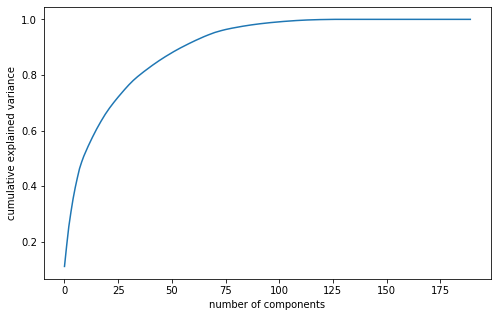

In [26]:
#Screeplot for the PCA components
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### PCA shows that around 75 components explain over 95% of the variance

In [27]:
# Initialize pca with 75 components
pca = PCA(n_components=75, random_state=RANDOM_STATE)
# fit and transform the training dataset
X_train_pca = pca.fit_transform(X_train)
Y_train_pca = Y_train.copy()

# transform the testing dataset
X_test_pca = pca.transform(X_test)
Y_test_pca = Y_test.copy()
# fit and transform the whole dataset
X_pca = pca.fit_transform(X)

#### plot feature correlation After PCA

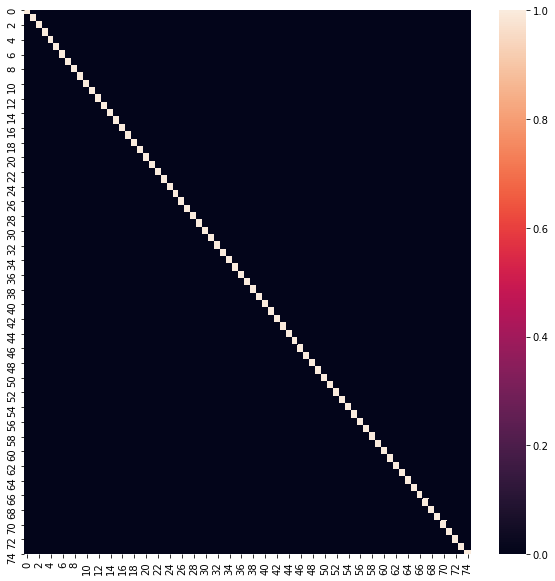

In [28]:
plt.rcParams["figure.figsize"] =(10,10)
sns.heatmap(data=pd.DataFrame(X_pca).corr())

#### Top 75 components have zero correlation

## Create Models

In [29]:
# List to store the model scores
model_score_list = []

In [30]:
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)

    return acc_score, roc_score, rec_score

### Create Baseline Models Using Default Values and 55 PCA Components

### Logistic Regression

In [31]:
# Initialize the Logistic regression
model = LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE)
# fit the pca training data
model.fit(X_train_pca, Y_train_pca)
# predict the testing pca data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, rec_score = evaluate_model(Y_test_pca, Y_pred)
# add the model scores to score list 
model_score_list.append({'model_name':'Baseline LogisticRegressionClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'recall_score':rec_score, "Best hyperparameters": "[defaults]"})

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy Score :  83.96
ROC AUC score :  83.91


### Decision Tree

In [32]:
# initialize the Decision Tree
model = DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE)
# fit the pca training data
model.fit(X_train_pca, Y_train_pca)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, rec_score = evaluate_model(Y_test_pca, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'Baseline DecisionTreeClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'recall_score':rec_score, "Best hyperparameters": "[defaults]"})

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Accuracy Score :  91.06
ROC AUC score :  68.3


### Random Forest

In [33]:
# initialize the randomforest
model = RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE)
# fit the pca training data
model.fit(X_train_pca, Y_train_pca)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, rec_score = evaluate_model(Y_test_pca, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'Baseline RandomForestClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'recall_score':rec_score, "Best hyperparameters": "[defaults]"})

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Accuracy Score :  95.56
ROC AUC score :  68.26


### Compare Baseline Models

In [34]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 'acc_score', 'roc_score', 'recall_score'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values(['recall_score','roc_score'], ascending=False)

,model_name,acc_score,roc_score,recall_score
0,Baseline LogisticRegressionClassifier,83.96,83.91,83.86
1,Baseline DecisionTreeClassifier,91.06,68.30,43.86
2,Baseline RandomForestClassifier,95.56,68.26,38.95


#### Logistic Regression has best Performance

### Hyperparameter Tuning, Cross Validation and Model Selection

### Logistic Regression

In [35]:

logistic = LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE, n_jobs = -1)

# create pipeline
steps = [
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [75], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit model
gs = model.fit(X_train, Y_train)

# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   46.2s finished


Best AUC:  0.9374017284785359
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 75}


#### Fit Best Estimator

In [36]:
# initialize the model with the best estimor
bestmodel = model.best_estimator_

# fit the pca training dataset
bestmodel.fit(X_train, Y_train)

# Predict the model with the pca testing dataset
Y_pred = bestmodel.predict(X_test)

acc_score, roc_score, rec_score = evaluate_model(Y_test, Y_pred)
model_score_list.append({'model_name':'Best LogisticRegressionClassifier', 'roc_score':roc_score, 'recall_score':rec_score, "Best hyperparameters": model.best_params_})

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=75,
                     random_state=42, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=10, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=-1, penalty='l2',
                                    random_state=42, solver='lbfgs', tol=0.0001,
                                    verbose=0, warm_start=False))],
         verbose=False)

Accuracy Score :  84.02
ROC AUC score :  83.94


### Random Forest

In [37]:
forest = RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit model
gs = model.fit(X_train, Y_train)

# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 24.4min finished


Best AUC:  0.9994700958265582
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


#### Fit Best Estimator

In [38]:
# initialize the model with the best estimator
bestmodel = model.best_estimator_

# fit the pca training dataset
bestmodel.fit(X_train, Y_train)

# Predict the model with the pca testing dataset
Y_pred = bestmodel.predict(X_test)

acc_score, roc_score, rec_score = evaluate_model(Y_test, Y_pred)
model_score_list.append({'model_name':'Best RandomForestClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'recall_score':rec_score, "Best hyperparameters": model.best_params_})

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Accuracy Score :  95.66
ROC AUC score :  81.85


## Evaluate the models

In [39]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 'acc_score', 'roc_score','recall_score', 'Best hyperparameters'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values(['recall_score','roc_score'], ascending=False)

,model_name,acc_score,roc_score,recall_score,Best hyperparameters
3,Best LogisticRegressionClassifier,NaN,83.94,83.86,"{'logistic__C': 10, 'logistic__penalty': 'l2',..."
0,Baseline LogisticRegressionClassifier,83.96,83.91,83.86,[defaults]
4,Best RandomForestClassifier,95.66,81.85,67.02,"{'criterion': 'entropy', 'max_features': 'auto'}"
1,Baseline DecisionTreeClassifier,91.06,68.30,43.86,[defaults]
2,Baseline RandomForestClassifier,95.56,68.26,38.95,[defaults]



### Based on the Business Goals, the most important evaluation metric is Recall.
### Examining the above results, Logistic Regression using default values is still the best model

## Identify Important Features/Predictor Attributes using Random Forests

In [40]:
X = data
Y = churn

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=RANDOM_STATE)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, criterion='gini')
# fit model
rf_model.fit(X_train, Y_train)

# predictors
features = X_train.columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance['Cumulative_Importance'] = feature_importance['importance_percentage'].cumsum()
feature_importance

(19335, 190) (19335,)
(8287, 190) (8287,)
14


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Sum of importance= 100.00000000000001


,variables,importance_percentage,Cumulative_Importance
0,roam_ic_mou_8,3.703633,3.703633
1,loc_ic_mou_8,3.361835,7.065468
2,loc_ic_t2m_mou_8,2.980658,10.046126
3,total_ic_mou_8,2.762901,12.809027
4,total_og_mou_8,2.619429,15.428456
5,roam_og_mou_8,2.394757,17.823213
6,diff_roam_og_mou,2.330124,20.153338
7,loc_og_t2m_mou_8,2.195005,22.348343
8,diff_roam_ic_mou,2.019837,24.368180
9,loc_og_mou_8,1.681268,26.049449


Text(0, 0.5, 'Feature Importance Score')

Text(0.5, 0, 'Feature Name')

<Figure size 720x720 with 0 Axes>

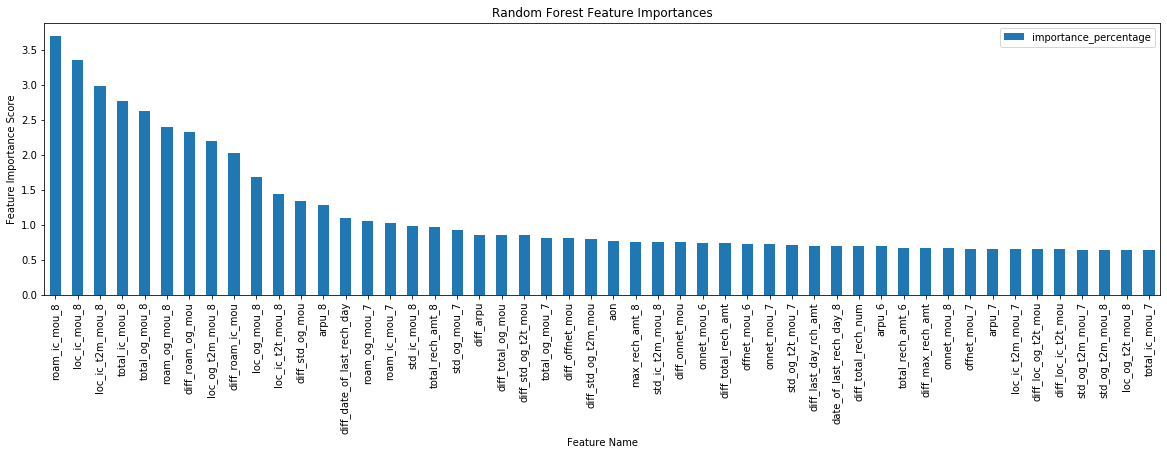

In [41]:
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5
feature_importance[0:50].plot(x='variables', y='importance_percentage' , kind='bar', title='Random Forest Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')

plt.show()

### TOP 10 IMPORTANT FEATURES

##### roam_ic_mou_8 - Total incoming minutes of usage on roaming for Month 8. Lower the value higher the churn rate.

##### total_ic_mou_8 - Total incoming minutes of usage for Month 8. Lower the value higher the churn rate.

##### loc_ic_mou_8 - Total incoming minutes of usage in local for Month 8. Lower the value higher the churn rate.

##### total_og_mou_8 - Total outgoing minutes of usage for Month 8. Lower the value higher the churn rate.

##### roam_og_mou_8 - Total outgoing minutes of usage on roaming in the recent month. Lower the value higher the churn rate.

##### loc_og_mou_8 - Total outgoing minutes of usage in local for Month 8. Lower the value higher the churn rate.

##### loc_ic_t2m_mou_8 - Total incoming minutes of usage calls to other operator mobiles for Month 8. Lower value has got high churn rate.

##### loc_og_t2m_mou_8 - Total outgoing minutes of usage calls to other operator mobiles for Month 8. Lower value has got high churn rate.

##### diff_roam_ic_mou - Difference in incoming minutes of usage on roaming for Month 6&7 from Month 8.

##### diff_roam_ic_mou - Difference in incoming minutes of usage on roaming for Month 6&7 from Month 8.


## Recommendation

### Recommend strategies to manage customer churn based on your observations.

### Business Insights

It costs 5-10 times more to acquire a new customer than to retain an existing one. Thus customer retention has become even more important than customer acquisition.

For Telecom Operators, retaining high profitable customers is the number one business goal.

### Monitoring Minutes of Usage

The analysis shows that customer churn is well predicted by drop in usage in all categories, Roaming, Local and STD. Thus monitoring MOU (Minutes of Usage) has to be continuously monitored to ensure that potential churners are detected in time and they are proactively given offers to improve their experience and retain them.

Hence we recommend that the Telecom company should simultaneously monitor these driver variables which are strong indicators of churn and results of the above ML model to manage and retain customers.